<small>To be able to run and edit this notebook, click *File -> Save a copy in Drive.*</small>

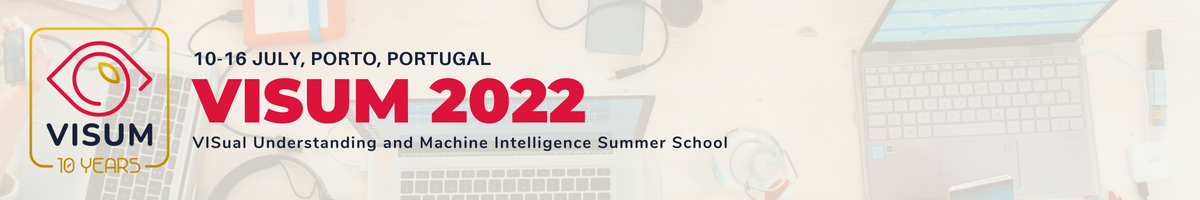

# Machine Learning (w/ Python and Scikit-learn)

**Summary:** This online session is intended for those giving their first steps in Python for Scientific Computing and Scikit-learn for Machine Learning.

**Lecturers:** Isabel Rio-Torto ([isabel.riotorto@inesctec.pt](mailto:isabel.riotorto@inesctec.pt)), Leonardo Capozzi ([leonardo.g.capozzi@inesctec.pt](mailto:leonardo.g.capozzi@inesctec.pt))

**Acknowledgements**: Ricardo Cruz ([ricardo.p.cruz@inesctec.pt](mailto:ricardo.p.cruz@inesctec.pt))

## What is Python

**MATLAB** = <i>"a programming language that expresses matrix and array mathematics directly"</i> (official webpage)

**C** = <i>"a general-purpose, procedural computer programming language (...) that map efficiently to typical machine instructions"</i> (wikipedia)

**Python** = <i>"a programming language that lets you work quickly and integrate systems more effectively"</i> (official webpage)

## Ecosystem

                 |-----------------------------------------------|
                 | Pandas | Scikit-learn | OpenCV | Scikit-image |
    |------------|-----------------------------------------------|---------|------------|
    | Matplotlib |                  NumPy                        | PyTorch | TensorFlow |
    |------------|-----------------------------------------------|---------|------------|
    |                                   Python                                          |
    |-----------------------------------------------------------------------------------|

## The Python grammar

### Variables and functions

* Assignments are performed using the `=` operator
* **Dynamic typing:** types are automatically inferred and type can change at any time.
* **Duck typing:** we do not concern ourselves about ensuring that a variable `v` has a certain property. We just try to do what we want and get a semantic error.
* **Static typing** is also possible to make big programs more robust. (To check for syntax integrity, there is a tool called `mypy`.)

In [ ]:
a = 5        # dynamic typing
b:int = 5    # static typing
print(a+b)

10


In [ ]:
# function declaration (dynamic typing)
def sum_two_numbers(n1, n2):
    return n1 + n2

In [ ]:
# function declaration (static typing)
def multiply_two_numbers(n1:int, n2:int) -> int:
    return n1 * n2

* Also notice that functions are **first-class citizens.** This means that you can treat a function as a variable.

In [ ]:
def apply_function(f, n1, n2):
    return f(n1, n2)

In [ ]:
print(apply_function(sum_two_numbers, 1, 2))
a = apply_function
print(a)

3
<function apply_function at 0x7f37d25ef5f0>


### Control flow

* Loops:
    * `while condition`
    * `for element in collection`
        * `for i in [1, 2, 3, 4]`
        * `for i in range(1, 5)`
* Branches: `if xxx` ... `elif xxx` ... `else`.
* Conditions: `if (x and y) or not z`.

Example: check if number is a prime number.

In [ ]:
def is_prime(n):
    assert n >= 1, 'The concept of prime numbers only applies to positive numbers'
    for i in range(2, n):  # intervals open to the right [i, j[
        if n % i == 0:  # modulus operator
            return False

    return True if n > 1 else False

Notice how blocks of code are defined: **Indentation** is *mandatory* in Python.

In [ ]:
is_prime(5)

True

In [ ]:
is_prime(9)

False

Do <u>defensive programming.</u> Make use of `assert` to do sanity checks in your code. It helps avoid wasting time debugging.

In [ ]:
is_prime(-10)

AssertionError: ignored

### Import packages

You can import your own files or system packages using the `import` command.

In [ ]:
import math # imports whole math package
print(math.pi)
print(math.factorial(4))

3.141592653589793
24


In [ ]:
from math import pi # imports only pi object from math package
print(pi)
print(factorial(2)) # throws an error because we only imported pi

3.141592653589793


NameError: ignored

What `import` does is first check if there exists a `math.py` file in the current directory. Otherwise, it checks in your Python user directory. Otherwise, it checks in the Python system directory.

### Structures: strings

There are several ways to format strings. Maybe the easiest are f-strings which allows to evaluate code inside the string.

In [ ]:
month = 'July'
month = "July"  # using " or ' is the same thing
year = 2022
print(f'We are in {month} of the year {year}.')

We are in July of the year 2022.


### Structures: lists

Lists are random-access collections that can be modified at any time. (Internally, they are implemented as an array.)

In [ ]:
l = [1, 2, 3]
print(l)
l.append(4)  # add item
print(l)
l += [5, 6]     # add list
print(l)

[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5, 6]


In [ ]:
print(l[3])  # indexing starts at 0

4


Create a list of prime numbers below 50:

In [ ]:
l = []
for i in range(1, 50):
    if is_prime(i):
        l.append(i)
print(l)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


Appending elements to a list is slow and ugly. **List comprehension** allows you to the same more efficiently:

In [ ]:
l = [i for i in range(1, 50) if is_prime(i)]
print(l)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


### Structures: dictionaries

Same thing as lists, but indexing is done by **keys,** instead of 0, 1, 2, 3, ...

In [ ]:
d = {
    'a': 5,
    3.14: 7.8,
    'e': 'hello',
    5: 1
}
print(d['e'])
print(d[3.14])
print(d.keys())

hello
7.8
dict_keys(['a', 3.14, 'e', 5])


Dictionary comprehension is also allowed.

## NumPy
You cannot do mathematical operations using lists. For that, you can use numpy arrays (mathematically, they are <u>tensors</u>).

In [ ]:
l = [1, 2, 3, 4]
print(l + 5)

TypeError: ignored

In [ ]:
import numpy as np
a = np.array(l)
print(a)
print(a * 2)
print(a + 1)
print(a * a)

[1 2 3 4]
[2 4 6 8]
[2 3 4 5]
[ 1  4  9 16]


In [ ]:
print(a.sum(), a.min(), a.max(), a.mean())

10 1 4 2.5


### Cross-Entropy

For discrete probability distributions `p` and `q`, cross-entropy is defined as:

$$H(p, q) = -\sum_{x \in X} p(x) log(q(x))$$

Example: Implement a function that calculates the cross-entropy between two discrete probability distributions `p` and `q`.

In [ ]:
import numpy as np

def cross_entropy(p, q):
    return -np.sum(p * np.log(q + 1e-9)) # add 1e-9 to avoid log(0)

Test:

In [ ]:
targets = np.array([0, 0, 0, 1]) # class 3

terrible_prediction = np.array([[0.05, 0.00, 0.90, 0.05]])
bad_prediction = np.array([[0.05, 0.00, 0.60, 0.35]])
good_prediction = np.array([0.05, 0.00, 0.05, 0.90])

print(f'Terrible prediction: {cross_entropy(targets, terrible_prediction)}')
print(f'Bad prediction: {cross_entropy(targets, bad_prediction)}')
print(f'Good prediction: {cross_entropy(targets, good_prediction)}')


Terrible prediction: 2.995732253553991
Bad prediction: 1.0498221216415349
Good prediction: 0.1053605145467152


As can be seen below, the Cross-Entropy loss increases as the predicted probability diverges from the actual label.

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png">

source: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

## Challenge #1: Euclidean distance

$$d=\sqrt{\sum_{i=1}^N\left(a_i-b_i\right)^2}$$

If I have a vector `(1,2,3)` and another vector `(5,3,4)` then the Euclidean distance between them will be equal to `√[(1-5)²+(2-3)²+(3-4)²] = ~4.24`.

Implement a function called `euclidean_distance(a, b)` that implements this distance.

In [ ]:
import numpy as np

def euclidean_distance(a, b):
  
    # Your code here
  
    euc_dist = 

    return euc_dist

Test:

In [ ]:
u = np.array([1, 2, 3])
v = np.array([5, 3, 4])
print(euclidean_distance(u, v))

## Challenge #2: 1-NN

Complete the following class to implement [k-Nearest Neighbor](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) with `k=1`.

This model predictions are made by comparing each new point against all points in the training set and make a prediction based on the `k` most similar cases. In our case, `k=1` therefore we should find the closest observation (lowest Euclidean distance) and then predict its class.

First, let's load a dataset. Usually, we would store the dataset in one or multiple files and then load them (using `np.loadtxt` or some other function). But here I will just copy-paste a subsample of the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg">

In [ ]:
import numpy as np

# iris dataset sample
X_train = [[5.1,3.5,1.4,0.2], [4.9,3.0,1.4,0.2], [4.7,3.2,1.3,0.2], [4.6,3.1,1.5,0.2],
           [7.0,3.2,4.7,1.4], [6.4,3.2,4.5,1.5], [6.9,3.1,4.9,1.5], [5.5,2.3,4.0,1.3],
           [6.3,3.3,6.0,2.5], [5.8,2.7,5.1,1.9], [7.1,3.0,5.9,2.1], [6.3,2.9,5.6,1.8]]
X_train = np.array(X_train)
Y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)

X_train: (12, 4)
Y_train: (12,)


Now, complete:

In [ ]:
class OneNN:
    def train(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, xnew):  # xnew = [7.0,3.2,4.7,1.4]
        assert len(xnew.shape) == 1, 'xnew must be a vector'
        # TODO: use your previous euclidean_distance() to compare xnew against
        # each observation in the training set. If xnew is most similar to self.X[i]
        # then you should return self.Y[i]
        # ...
        
        # Your code here

Test:

In [ ]:
model = OneNN()
model.train(X_train, Y_train)
x = np.array([6.4,3.2,4.5,1.5])
print(model.predict(x))

It should output class `1`.

## Machine Learning with Scikit-learn

We will be using the [PH2 dataset](https://www.fc.up.pt/addi/ph2%20database.html) -- we will decide if a skin lesion image.png is healthy or not.



Start by downloading the [images](https://drive.google.com/file/d/1YVE3lekpLfncgsChyZP11GeFfKnStewl/view?usp=sharing) and the [labels](https://docs.google.com/spreadsheets/d/1yqA13pr4BcWQUgQSahT2twnydMHDBqIC/edit?usp=sharing&ouid=114301402271418148588&rtpof=true&sd=true).

To access the data you have two options:
*   upload them to your Google Drive and mount the Drive folder here
*   directly upload the data to this notebook (take into account that with this option the data is only temporarily available; if you close the notebook you will have to reupload everything)



In [ ]:
# We chose option 1 (mounting the google drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let's start by unziping the images
!unzip '/content/drive/MyDrive/images.zip'

Archive:  /content/drive/MyDrive/images.zip
   creating: images/
  inflating: images/IMD284.bmp       
  inflating: images/IMD045.bmp       
  inflating: images/IMD092.bmp       
  inflating: images/IMD125.bmp       
  inflating: images/IMD118.bmp       
  inflating: images/IMD044.bmp       
  inflating: images/IMD050.bmp       
  inflating: images/IMD078.bmp       
  inflating: images/IMD285.bmp       
  inflating: images/IMD278.bmp       
  inflating: images/IMD085.bmp       
  inflating: images/IMD091.bmp       
  inflating: images/IMD132.bmp       
  inflating: images/IMD126.bmp       
  inflating: images/IMD331.bmp       
  inflating: images/IMD133.bmp       
  inflating: images/IMD090.bmp       
  inflating: images/IMD047.bmp       
  inflating: images/IMD251.bmp       
  inflating: images/IMD279.bmp       
  inflating: images/IMD043.bmp       
  inflating: images/IMD057.bmp       
  inflating: images/IMD080.bmp       
  inflating: images/IMD137.bmp       
  inflating: images/IMD

In [ ]:
# We can read the excel file with Pandas
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/PH2_dataset.xlsx')
print(data)

    Image Name Histological Diagnosis  Label  Asymmetry Pigment Network  \
0       IMD003                    NaN    0.0        0.0               T   
1       IMD009                    NaN    0.0        0.0               T   
2       IMD016                    NaN    0.0        0.0               T   
3       IMD022                    NaN    0.0        0.0               T   
4       IMD024                    NaN    0.0        0.0               T   
..         ...                    ...    ...        ...             ...   
195     IMD424               Melanoma    2.0        2.0              AT   
196     IMD425               Melanoma    2.0        2.0              AT   
197     IMD426               Melanoma    2.0        2.0              AT   
198     IMD429                    NaN    2.0        0.0              AT   
199     IMD435        Lentigo Maligna    2.0        2.0              AT   

    Dots/Globules Streaks Regression Areas Blue-Whitish Veil White  Red  \
0               A       

In [ ]:
# OpenCV-Python for image analysis
import cv2
# NumPy for linear algebra and array manipulation
import numpy as np
# Matplotlib to create nice plots
import matplotlib.pyplot as plt

In [ ]:
# Read images
images_names = list(data['Image Name'].values)
images = []
for fname in images_names:
  im = cv2.imread('/content/images/' + fname + '.bmp')
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im, (256,256))
  images.append(np.array(im))

images = np.array(images)

# Read labels
labels = np.array(data['Label'].values)
labels = np.array(list(map(int, labels))) # convert from float to int

In [ ]:
assert len(images) == len(labels), 'Images and labels have differing lengths: %s vs %s' % (len(images), len(labels))

In [ ]:
# We are going to consider only healthy and melanoma cases, so class 1 will be excluded and class 2 will be the new class 1
images = images[labels != 1]
labels = labels[labels != 1]
labels[labels == 2] = 1

# Let's also filter our DataFrame as it will be needed afterwards
data = data[data['Label'] != 1.0]

In [ ]:
assert len(images) == len(labels), 'Images and labels have differing lengths: %s vs %s' % (len(images), len(labels))

### 1. What is Machine Learning?

Machine learning is the process of extracting useful information from data (images, signals, etc). For example, deciding if this skin lesion image.png looks healthy or not.

(Other popular names for machine learning are "knowledge extraction", "pattern recognition", "data mining".)

Programming consists in converting inputs into outputs:

```
╔═══════╗     ╔═════════╗     ╔════════╗
║ Input ║ ══> ║ Program ║ ══> ║ Output ║
║  X    ║     ║    f    ║     ║   Y    ║
╚═══════╝     ╚═════════╝     ╚════════╝
```

* In traditional programming, we have to write the program $f$ that converts $X$ such that $Y=f(X)$.
* In machine learning, we use iterative processes to automatically adjust $f$ until $Y=f(X)$.

Here, we will focus on **supervised learning,** where we have both $X$ (input) and $Y$ (output).

**How can we make sense of an image?**

The machine learning pipeline:

```
╔═══════╗     ╔══════════╗     ╔═══════╗     ╔════════╗
║ Image ║ ══> ║ Features ║ ══> ║ Model ║ ══> ║ Output ║
╚═══════╝     ╚══════════╝     ╚═══════╝     ╚════════╝
```

In our case, we are going to use the PH2 dataset:

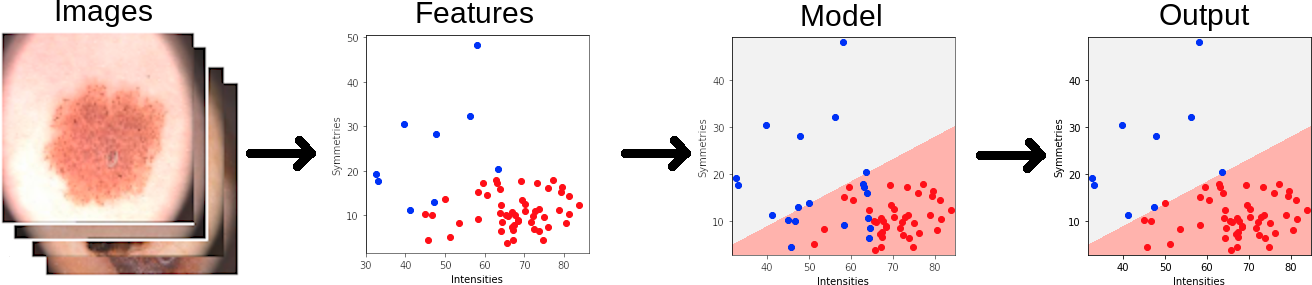

### 2. Extracting features from images

Features are things related to: color, texture, shape, motion, etc.

Let us first remember what we have:
* `images`: an array `(120, 256, 256, 3)` with all the images
* `labels`: an array `(120,)` specifying if the image is healthy (0) or with melanoma (1).

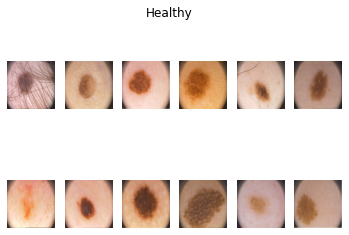

In [ ]:
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(images[labels == 0][i])
    plt.axis('off')
plt.suptitle('Healthy')
plt.show()

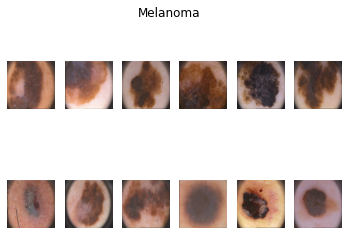

In [ ]:
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(images[labels == 1][i])
    plt.axis('off')
plt.suptitle('Melanoma')
plt.show()

**Feature #1:** for each image in `images`, let's extract the average color.

In [ ]:
features1 = np.mean(images, (1, 2, 3))

In [ ]:
features1.shape

(120,)

How well does that feature help split the data into healthy and sick?

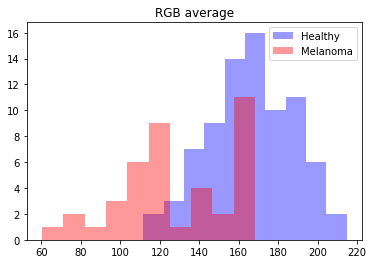

In [ ]:
plt.hist(features1[labels == 0], color='b', alpha=0.4, label='Healthy')
plt.hist(features1[labels == 1], color='r', alpha=0.4, label='Melanoma')
plt.legend()
plt.title('RGB average')
plt.show()

**Feature #2:** the melanoma lesions look *less* symmetric than the healthy lesions. Let's use the Asymmetry property already available in our dataset.

According to the dataset information, a lesion can be:


*   0 - Fully Symmetric
*   1 - Asymmetric in One Axis
*   2 - Fully Asimmetric



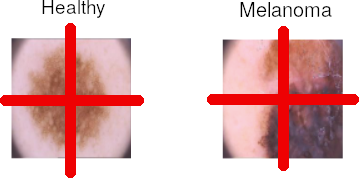

In [ ]:
features2 = np.array(data['Asymmetry'].values)
features2 = np.array(list(map(int, features2))) # convert from float to int
features2

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2])

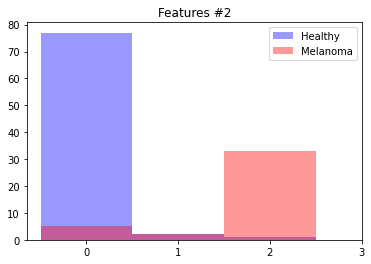

In [ ]:
bins = np.arange(0, features2.max() + 1.5) - 0.5
fig, ax = plt.subplots()
_ = ax.hist(features2[labels == 0], bins, color='b', alpha=0.4, label='Healthy')
_ = ax.hist(features2[labels == 1], bins, color='r', alpha=0.4, label='Melanoma')
ax.set_xticks(bins + 0.5)
plt.legend()
plt.title('Features #2')
plt.show()

Combining *both* features, we are able to better differentiate between healthy and sick skin lesions...

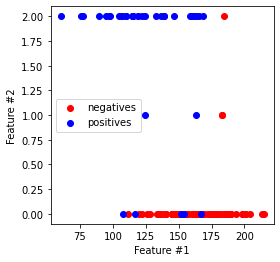

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

plt.scatter(features1[labels == 0], features2[labels == 0], color='red', label='negatives')
plt.scatter(features1[labels == 1], features2[labels == 1], color='blue', label='positives')
plt.xlabel('Feature #1')
plt.ylabel('Feature #2')
plt.legend()
plt.show()

We can now combine both features into a single array:

In [ ]:
features = np.stack((features1, features2), 1)
print(features.shape)

(120, 2)


### 3. Training models using scikit-learn

We will be using machine learning models provided by [scikit-learn](https://scikit-learn.org/).

Possible models:

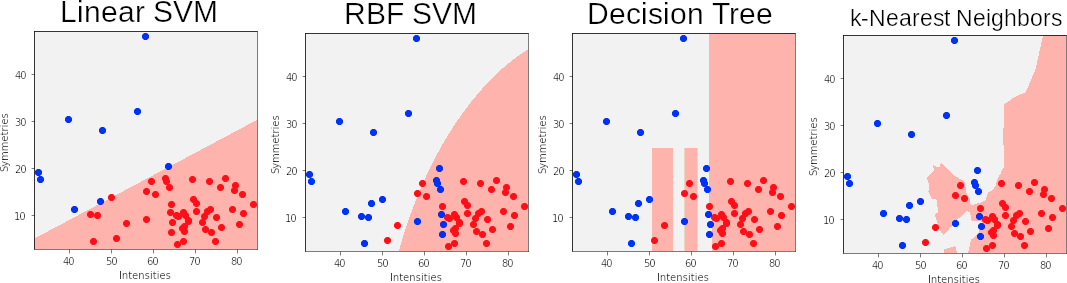

([linear svm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), [rbf svm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))

**Train-test split**

How good is the model?
* In statistics, we use things like hypothesis tests (p-value) to evaluate how well the model is *modelling* the data.
* In machine learning, we don't have those tools -- we have to use *empirical* tests.<br>For example, we can split the data in a training set (seen by the model) and a testing set (unseen by the model).

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)
print(f"Train: {len(train_features)} images\nTest: {len(test_features)} images\n")

Train: 96 images
Test: 24 images



**Create and train the machine learning model**

Sklearn makes the process super-easy. Just choose the model you want ([`LinearSVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), [`SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [`DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [`KNeighborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), then call its `fit()` function:

```
model = ModelName()
model.fit(X, y)
```

PS: Remember to use the training data, not the entire data!

PS2: If you use `LinearSVC()`, specify `dual=False`.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = [LinearSVC(dual=False, fit_intercept=False), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=5)]
models_names = ['LinearSVC', 'DecisionTree', 'KNN']

trained_models = {}
for n, m in zip(models_names, models):
  print("Training " + n)
  m.fit(train_features, train_labels) # actual model training
  trained_models[n] = m

Training LinearSVC
Training DecisionTree
Training KNN


We can evaluate `test_preds` against `test_labels` (ground-truth) to see how well the models have performed:

One way of evaluating the performance of our models is by obtaining the confusion matrix as follows:

|       | **Prediction=False** | **Prediction=True** |
| ---        |    ----   |          --- |
| **Label=False**      | True negative | False positive |
| **Label=True**   | False negative | True positive |


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

for n in models_names:
    print("Model: " + n)
    print(" Confusion matrix:")
    test_preds = trained_models[n].predict(test_features) # inference (predict if test images are healthy or not)
    print(confusion_matrix(test_labels, test_preds))
    print(f"  F1 score: {np.round(f1_score(test_labels, test_preds), 2)}\n\n")

Model: LinearSVC
 Confusion matrix:
[[16  0]
 [ 1  7]]
  F1 score: 0.93


Model: DecisionTree
 Confusion matrix:
[[14  2]
 [ 1  7]]
  F1 score: 0.82


Model: KNN
 Confusion matrix:
[[16  0]
 [ 1  7]]
  F1 score: 0.93




We can also see what decisions the model is making across the feature space:

In [ ]:
def find_contour(features, model, plot_step=0.02):
    # based on https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    model = model.predict if hasattr(model, 'predict') else model
    zz = model(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return xx, yy, zz

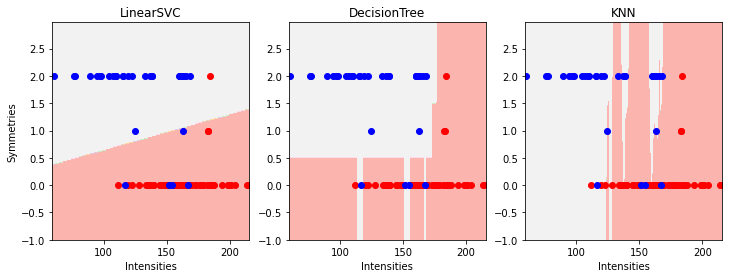

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i, n in enumerate(models_names):
  ax = axs[i]
  xx, yy, zz = find_contour(train_features, trained_models[n])
  ax.contourf(xx, yy, zz, cmap='Pastel1', vmin=0, vmax=1)
  ax.scatter(train_features[train_labels == 0][:, 0], train_features[train_labels == 0][:, 1], color='red')
  ax.scatter(train_features[train_labels == 1][:, 0], train_features[train_labels == 1][:, 1], color='blue')
  ax.set_xlabel('Intensities')
  ax.set_title(n)
axs[0].set_ylabel('Symmetries')
fig.show()

### Challenge #3

Try to add another relevant feature and retrain the previous models. Compare the performance with and without the new feature.

Suggestion: use the 'Blue Whitish Veil' feature already available in the PH2 dataset. This feature is not given in a numerical format (i.e., it is either 'Present' or 'Absent').

Hint: Use Scikit-learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the feature into numerical values.

### Challenge #4

Implement a LogisticRegression model.

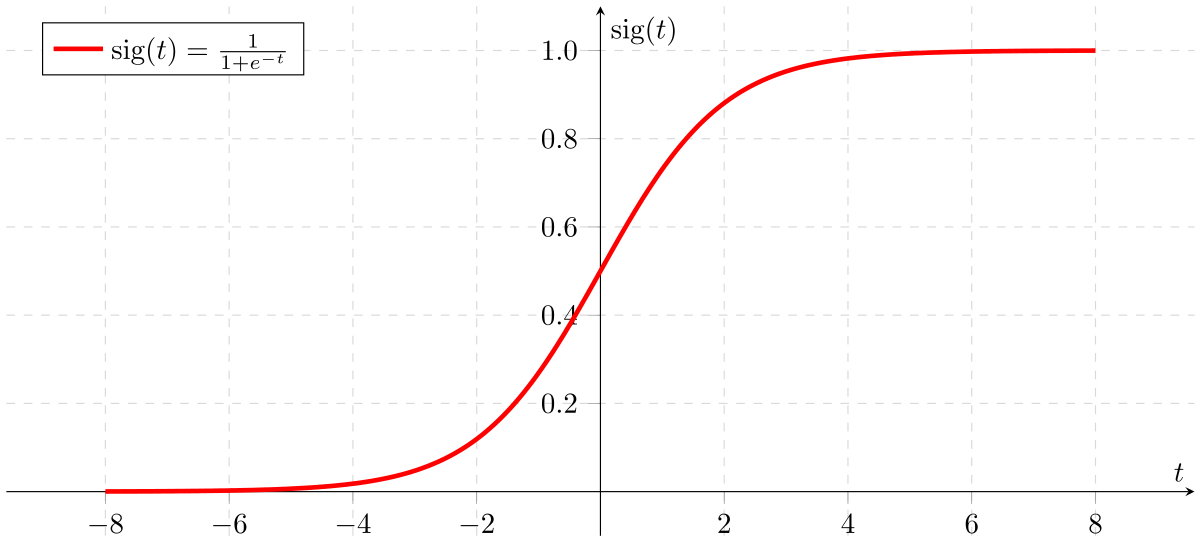

Source: [https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [ ]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score

# Create a LogisticRegression object
logreg = # Your code here

# Train this classifier on data
# Your code here

# Predict on test features
test_preds = # Your code here

# Get the F1 score
f1 = # Your code here
print(f"F1-score: {f1}")

# Plot the Confusion Matrix
cfm = # Your code here
print(f"Confusion Matrix: {cfm}")

# Plot these results
xx, yy, zz = find_contour(train_features, logreg)
plt.contourf(xx, yy, zz, cmap='Pastel1', vmin=0, vmax=1)
plt.scatter(train_features[train_labels == 0][:, 0], train_features[train_labels == 0][:, 1], color='red')
plt.scatter(train_features[train_labels == 1][:, 0], train_features[train_labels == 1][:, 1], color='blue')
plt.xlabel('Intensities')
plt.ylabel('Symmetries')
plt.show()